In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [2]:
#pip install pmdarima 

In [3]:
df=pd.read_csv("exchange_rate.csv")

In [4]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [5]:
data=pd.DataFrame(df)

In [6]:
data['date']=pd.to_datetime(data['date'],format="mixed")


In [7]:
data['date']

0      1990-01-01
1      1990-02-01
2      1990-03-01
3      1990-04-01
4      1990-05-01
          ...    
7583   2010-06-10
7584   2010-07-10
7585   2010-08-10
7586   2010-09-10
7587   2010-10-10
Name: date, Length: 7588, dtype: datetime64[ns]

In [8]:
data['date'].dt.year

0       1990
1       1990
2       1990
3       1990
4       1990
        ... 
7583    2010
7584    2010
7585    2010
7586    2010
7587    2010
Name: date, Length: 7588, dtype: int32

In [9]:
data['date'].dt.month

0        1
1        2
2        3
3        4
4        5
        ..
7583     6
7584     7
7585     8
7586     9
7587    10
Name: date, Length: 7588, dtype: int32

In [10]:
data['date'].dt.day

0        1
1        1
2        1
3        1
4        1
        ..
7583    10
7584    10
7585    10
7586    10
7587    10
Name: date, Length: 7588, dtype: int32

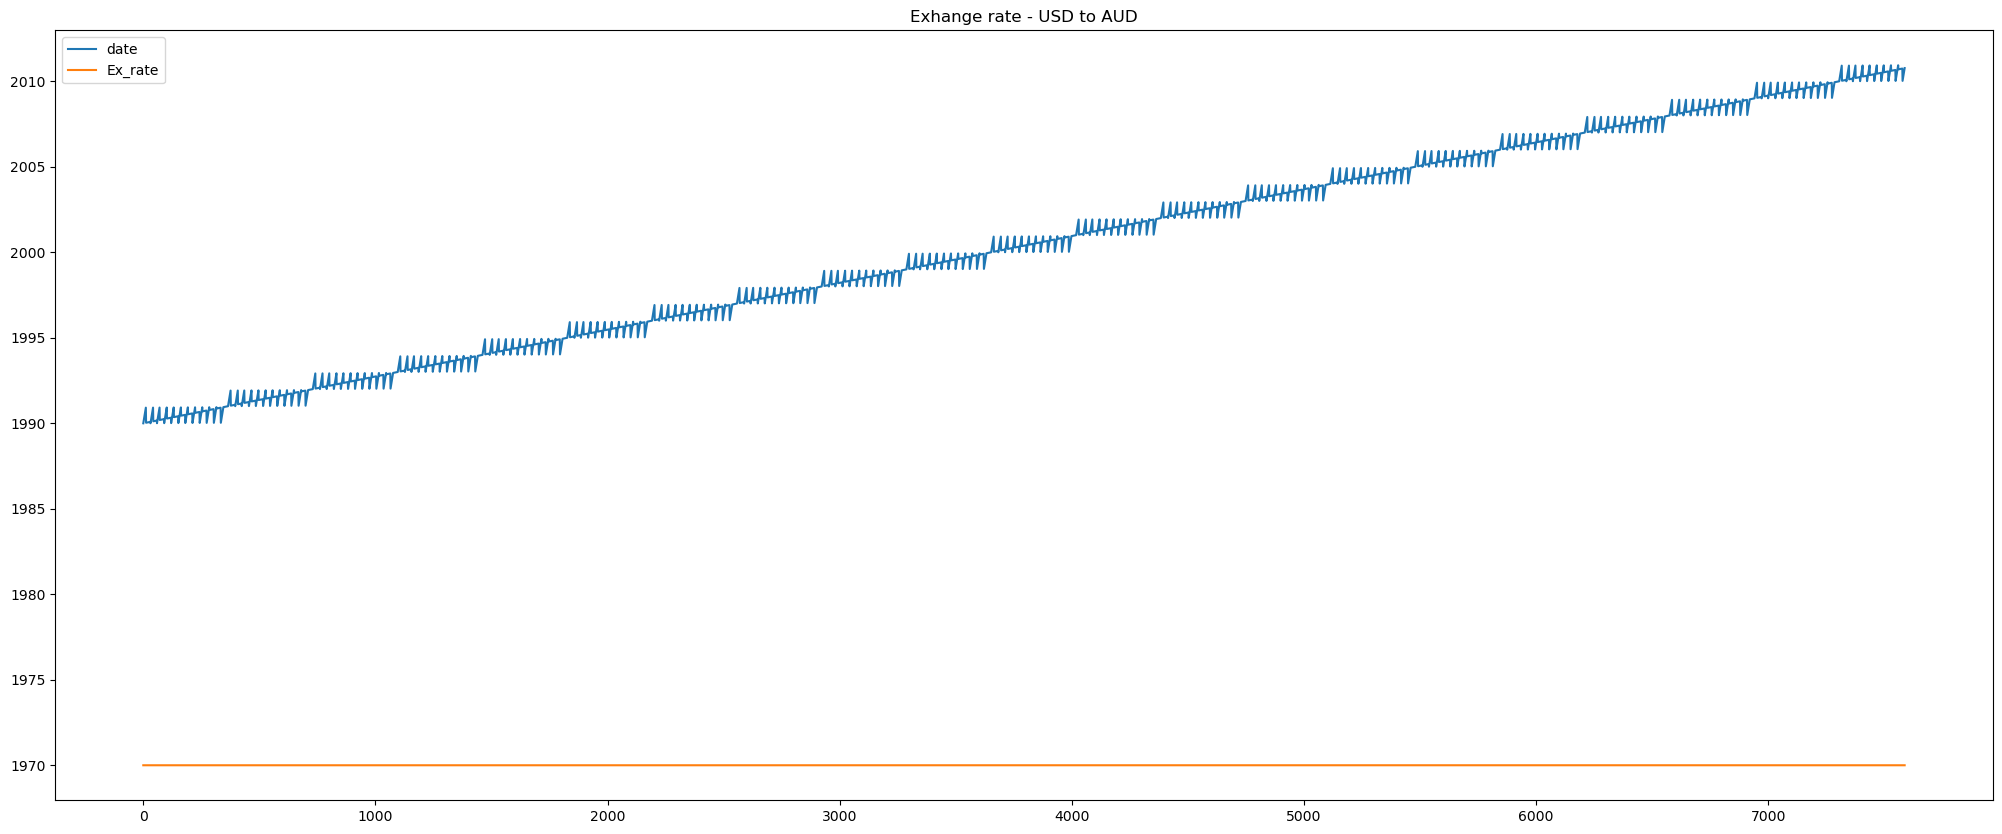

In [11]:
data.plot(figsize=(25,10))
plt.title('Exhange rate - USD to AUD')
plt.savefig('Exchange rate - AUD to AUD.png')
plt.show()

In [12]:
data

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-02-01,0.781800
2,1990-03-01,0.786700
3,1990-04-01,0.786000
4,1990-05-01,0.784900
...,...,...
7583,2010-06-10,0.718494
7584,2010-07-10,0.721839
7585,2010-08-10,0.723197
7586,2010-09-10,0.720825


In [13]:
data.set_index('date',inplace=True)

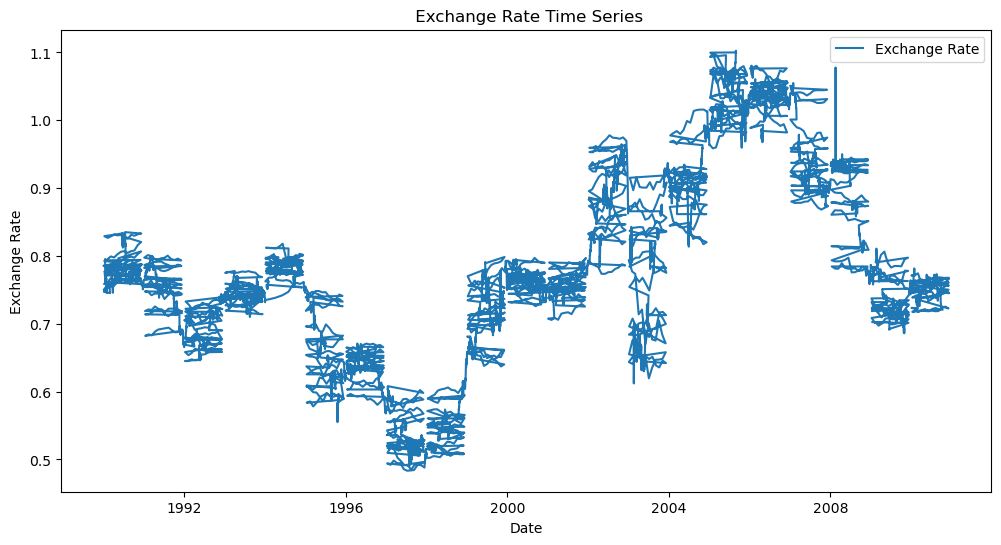

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Ex_rate'], label='Exchange Rate')
plt.title(' Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [15]:
data.isnull().sum()

Ex_rate    0
dtype: int64

In [16]:
order=auto_arima(data['Ex_rate'])

In [17]:
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [19]:
model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

In [20]:
 forecast=model_fit.forecast(steps=10)

In [21]:
print(forecast)

7588    0.720812
7589    0.720594
7590    0.720258
7591    0.720517
7592    0.720355
7593    0.720477
7594    0.720537
7595    0.720241
7596    0.720422
7597    0.720463
dtype: float64


In [39]:
y_actual=df["Ex_rate"][-10:]
ypred=forecast

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_actual,ypred)
mse=mean_squared_error(y_actual,ypred)
mape = np.mean(np.abs((y_actual - ypred) / y_actual)) * 100


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"MAPE: {mape}")

MAE: 0.0015258294766310355
MSE: 3.1700513413064975e-06
MAPE: nan


C:\Users\datta\AppData\Local\Temp\ipykernel_11772\889870530.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=11, freq='M')[1:], forecast, label='Forecast', color='blue')
C:\Users\datta\AppData\Local\Temp\ipykernel_11772\889870530.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=11, freq='M')[1:], forecast, label='ETS Forecast', color='red')


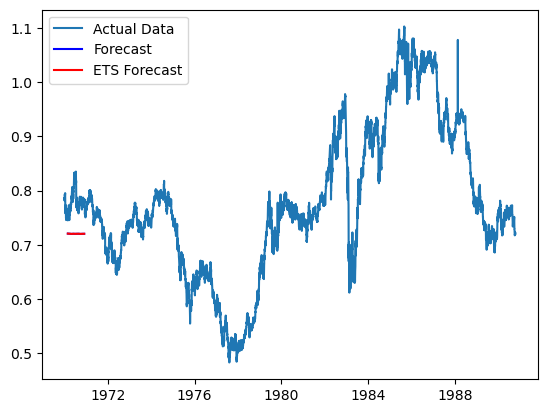

In [51]:
plt.plot(df.index, df['Ex_rate'], label='Actual Data')
plt.plot(pd.date_range(df.index[-1], periods=11, freq='M')[1:], forecast, label='Forecast', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=11, freq='M')[1:], forecast, label='ETS Forecast', color='red')
plt.legend()
plt.show()

In [ ]:
data.shape

In [ ]:
adfuller(df['Ex_rate'])[1] # returns p value at index 1


Null hypothesis: Data is Non stationary

Alternate Hypothesis: Data is Stationary

If p< 0.05 ; Data is stationary

if p>0.05; Data is not stationary

According the p-value, the dataset is stationary as the p value is less than alpha value.

In [53]:
train=data.iloc[:-500]
test=data.iloc[-500:]

In [55]:
train

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2009-05-24,0.737110
2009-05-25,0.737110
2009-05-26,0.738525


In [57]:
model=ARIMA(train['Ex_rate'],order=(0,0,0)).fit()

E:\LDPlayer\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\LDPlayer\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\LDPlayer\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\LDPlayer\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\LDPlayer\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A d

In [58]:
test

,Ex_rate
date,
2009-05-29,0.734592
2009-05-30,0.733272
2009-05-31,0.731904
2009-01-06,0.731904
2009-02-06,0.720747
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


In [59]:
train.head(2)

,Ex_rate
date,
1990-01-01,0.7855
1990-02-01,0.7818


In [60]:
ypred=model.predict(start=7088,end=7580)

E:\LDPlayer\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\LDPlayer\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [61]:
ypred

7088    0.779822
7089    0.779822
7090    0.779822
7091    0.779822
7092    0.779822
          ...   
7576    0.779822
7577    0.779822
7578    0.779822
7579    0.779822
7580    0.779822
Name: predicted_mean, Length: 493, dtype: float64

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7088
Model:                          ARIMA   Log Likelihood                3838.768
Date:                Tue, 10 Dec 2024   AIC                          -7673.536
Time:                        15:46:44   BIC                          -7659.804
Sample:                             0   HQIC                         -7668.807
                               - 7088                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7798      0.002    460.275      0.000       0.777       0.783
sigma2         0.0198      0.000     51.189      0.000       0.019       0.021
===================================================================================
Ljung-Box (L1) (Q):                7077.42   Jarque-Bera (JB):               114.87
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.30   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""